# Table Evaluator

To evaluate how similar a synthesized dataset is to a real data
https://baukebrenninkmeijer.github.io/table-evaluator/index.html 

## Base Accuracy for Real Dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from numpy.random import randn
from matplotlib import pyplot

In [2]:
data = pd.read_csv('diabetes.csv')

print (data.shape)
print (data.tail())
print (data.columns)

(768, 9)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.Outcome.unique()

array([1, 0])

In [8]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

label = ['Outcome']
X = data[features]
y = data[label]

In [9]:
print (y)

     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
%time clf_true.fit(X_true_train,y_true_train)


%time y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:",metrics.classification_report(y_true_test, y_true_pred))

CPU times: user 156 ms, sys: 2.65 ms, total: 159 ms
Wall time: 160 ms
CPU times: user 16.1 ms, sys: 661 µs, total: 16.8 ms
Wall time: 16.5 ms
Base Accuracy: 0.7489177489177489
Base classification report:               precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



/Users/susman/opt/anaconda3/envs/GANs/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [11]:
X.shape

(768, 8)

In [12]:
data.shape

(768, 9)

In [13]:
print (y_true_test)

     Outcome
668        0
324        0
624        0
690        0
473        0
..       ...
619        1
198        1
538        0
329        0
302        0

[231 rows x 1 columns]


## Generate Synthetic Data

In [14]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    
    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    
    return x_input

In [15]:
# generate_fake_samples function to produce fake data
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    
    # predict outputs
    X = generator.predict(x_input)
    
    # create class labels
    y = np.zeros((n_samples, 1))
    return X, y

In [16]:
# generate n real samples with class labels
def generate_real_samples(n):
    
  X = data.sample(n)

  #generate class labels
  y = np.ones((n, 1))

  return X, y

In [17]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=9):

  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))

  model.add(Dense(30, activation='relu'))
  # model.add(Dense(n_outputs, activation='sigmoid'))
    
  model.add(Dense(n_outputs, activation='linear'))
  return model

In [18]:
generator1 = define_generator(10, 9)
generator1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 9)                 279       
                                                                 
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


2022-05-01 15:10:44.822808: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
# define the standalone discriminator model
def define_discriminator(n_inputs=9):
    
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
discriminator1 = define_discriminator(9)
discriminator1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                250       
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [21]:
# define the combined generator and discriminator model, for updating the generator

def define_gan(generator, discriminator):
    
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

In [22]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
    
    # plot loss
    plt.subplot(1, 1, 1)
    plt.plot(d_hist, label='d')
    plt.plot(g_hist, label='gen')
    
    plt.show()
    plt.close()

In [23]:
# train the generator and discriminator

def train(g_model, d_model, gan_model, latent_dim, n_epochs=1000, n_batch=128):
    
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    
    d_history = []
    g_history = []
    
    # manually enumerate epochs
    for epoch in range(n_epochs):
        
        # prepare real samples
        x_real, y_real = generate_real_samples(half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator
        d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
        d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
    
        # create inverted labels for the fake samples
        y_gan = np.ones((n_batch, 1))
    
        # update the generator via the discriminator's error
        g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

        print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
        d_history.append(d_loss)
        g_history.append(g_loss_fake)
        
    plot_history(d_history, g_history)
        
        # save model
    g_model.save('trained_generated_model_20210205_v3.h5')

In [24]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    
    # prepare real samples
    x_real, y_real = generate_real_samples(n)
    
    # evaluate discriminator on real examples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    # evaluate discriminator on fake examples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    
    # scatter plot real and fake data points
    pyplot.scatter(x_real[:, 0], color='red')
    pyplot.scatter(x_fake[:, 0], color='blue')
    pyplot.show()

>1, d1=0.000, d2=0.793 d=0.396 g=0.640
>2, d1=0.000, d2=0.794 d=0.397 g=0.658
>3, d1=0.000, d2=0.703 d=0.352 g=0.699
>4, d1=0.000, d2=0.664 d=0.332 g=0.747
>5, d1=0.000, d2=0.653 d=0.326 g=0.762
>6, d1=0.000, d2=0.616 d=0.308 g=0.794
>7, d1=0.118, d2=0.600 d=0.359 g=0.844
>8, d1=0.001, d2=0.554 d=0.278 g=0.875
>9, d1=0.000, d2=0.534 d=0.267 g=0.918
>10, d1=0.000, d2=0.519 d=0.259 g=0.931
>11, d1=0.000, d2=0.500 d=0.250 g=0.971
>12, d1=0.000, d2=0.472 d=0.236 g=1.020
>13, d1=0.081, d2=0.480 d=0.280 g=1.000
>14, d1=0.291, d2=0.477 d=0.384 g=0.983
>15, d1=0.152, d2=0.484 d=0.318 g=1.004
>16, d1=0.000, d2=0.501 d=0.250 g=0.961
>17, d1=0.000, d2=0.495 d=0.248 g=0.979
>18, d1=0.000, d2=0.512 d=0.256 g=0.938
>19, d1=0.000, d2=0.515 d=0.258 g=0.948
>20, d1=0.000, d2=0.515 d=0.257 g=0.952
>21, d1=0.000, d2=0.527 d=0.264 g=0.950
>22, d1=0.063, d2=0.526 d=0.294 g=0.932
>23, d1=0.000, d2=0.537 d=0.268 g=0.919
>24, d1=0.000, d2=0.511 d=0.255 g=0.932
>25, d1=0.000, d2=0.515 d=0.257 g=0.933
>26, d1=0

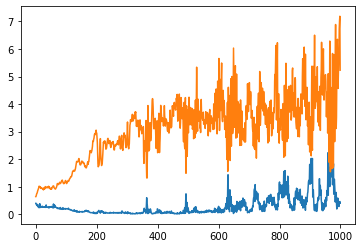

In [25]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

# Evaluate the Quality of Generated Fake Data With Model

In [26]:
from keras.models import load_model
model = load_model('trained_generated_model_20210205_v3.h5')

In [27]:
latent_points = generate_latent_points(10, 750)

In [28]:
X = model.predict(latent_points)

In [29]:
data_fake = pd.DataFrame(data=X,  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [30]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-5.587157,142.952438,70.449402,42.583912,34.781330,39.987133,13.435157,44.033966,-1.395991
1,-1.727075,50.716831,23.326956,14.478318,41.630535,13.115942,4.717826,14.359137,-1.067208
2,-3.740470,104.098770,120.334122,68.175903,54.740280,41.646900,10.536823,65.088524,-1.225987
3,-1.483886,57.116516,93.878220,52.183590,56.217243,26.801222,5.473969,49.191639,-0.364765
4,-4.245612,102.139671,42.811840,22.556665,15.522375,22.139650,9.287255,28.113611,1.376407


In [31]:
data_fake.Outcome.min()

-10.181304

In [32]:
data_fake.Outcome.max()

3.144843

In [33]:
outcome_mean = data_fake.Outcome.mean()

In [34]:
data_fake['Outcome'] = data_fake['Outcome'] > outcome_mean

In [35]:
data_fake['Outcome']

0       True
1       True
2       True
3       True
4       True
       ...  
745    False
746    False
747    False
748    False
749    False
Name: Outcome, Length: 750, dtype: bool

In [36]:
data_fake["Outcome"] = data_fake["Outcome"].astype(int)

In [37]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-5.587157,142.952438,70.449402,42.583912,34.781330,39.987133,13.435157,44.033966,1
1,-1.727075,50.716831,23.326956,14.478318,41.630535,13.115942,4.717826,14.359137,1
2,-3.740470,104.098770,120.334122,68.175903,54.740280,41.646900,10.536823,65.088524,1
3,-1.483886,57.116516,93.878220,52.183590,56.217243,26.801222,5.473969,49.191639,1
4,-4.245612,102.139671,42.811840,22.556665,15.522375,22.139650,9.287255,28.113611,1


In [38]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

label = ['Outcome']
X_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [39]:
X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(X_fake_train,y_fake_train)

y_fake_pred=clf_fake.predict(X_fake_test)
print("Accuracy of fake data model:",metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model:",metrics.classification_report(y_fake_test, y_fake_pred))

/Users/susman/opt/anaconda3/envs/GANs/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of fake data model: 0.9466666666666667
Classification report of fake data model:               precision    recall  f1-score   support

           0       0.95      0.94      0.94       109
           1       0.94      0.96      0.95       116

    accuracy                           0.95       225
   macro avg       0.95      0.95      0.95       225
weighted avg       0.95      0.95      0.95       225



In [40]:
X_final = X[:, :8]
print ('X_final: ', X_final[:3])

y_final = X[:, :]
print ('y_final: ', y_final[:3])

X_final:  [[ -5.587157  142.95244    70.4494     42.58391    34.78133    39.987133
   13.435157   44.033966 ]
 [ -1.7270749  50.71683    23.326956   14.478318   41.630535   13.115942
    4.7178264  14.359137 ]
 [ -3.7404697 104.09877   120.33412    68.1759     54.74028    41.6469
   10.536823   65.088524 ]]
y_final:  [[ -5.587157  142.95244    70.4494     42.58391    34.78133    39.987133
   13.435157   44.033966   -1.3959912]
 [ -1.7270749  50.71683    23.326956   14.478318   41.630535   13.115942
    4.7178264  14.359137   -1.0672083]
 [ -3.7404697 104.09877   120.33412    68.1759     54.74028    41.6469
   10.536823   65.088524   -1.2259871]]


In [41]:
X = X [:,:8]

In [42]:
y_fake_pred = clf_true.predict(X)

/Users/susman/opt/anaconda3/envs/GANs/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [43]:
y_fake_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,

# Evaluate the Quality of Generated Fake Data With Table_evaluator

In [44]:
data_fake.shape

(750, 9)

In [45]:
data.shape

(768, 9)

In [46]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-5.587157,142.952438,70.449402,42.583912,34.781330,39.987133,13.435157,44.033966,1
1,-1.727075,50.716831,23.326956,14.478318,41.630535,13.115942,4.717826,14.359137,1
2,-3.740470,104.098770,120.334122,68.175903,54.740280,41.646900,10.536823,65.088524,1
3,-1.483886,57.116516,93.878220,52.183590,56.217243,26.801222,5.473969,49.191639,1
4,-4.245612,102.139671,42.811840,22.556665,15.522375,22.139650,9.287255,28.113611,1


In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
%load_ext autoreload
%autoreload 2

In [49]:
from table_evaluator import load_data, TableEvaluator

IPython not installed.


In [50]:
table_evaluator = TableEvaluator(data, data_fake)

In [51]:
table_evaluator.evaluate(target_col='Outcome')


Classifier F1-scores and their Jaccard similarities::
                             f1_real  f1_fake  jaccard_similarity
index                                                            
DecisionTreeClassifier_fake   0.5067   0.9267              0.3216
DecisionTreeClassifier_real   0.7200   0.3800              0.2658
LogisticRegression_fake       0.4800   0.9533              0.3100
LogisticRegression_real       0.8200   0.4267              0.2658
MLPClassifier_fake            0.4800   0.9733              0.3274
MLPClassifier_real            0.7000   0.4067              0.2931
RandomForestClassifier_fake   0.4867   0.9267              0.3158
RandomForestClassifier_real   0.7400   0.3800              0.1811

Privacy results:
                                         result
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    2.0302
nearest neighbor std                     0.7986

Miscellaneous results:
                                  Result
Column Cor

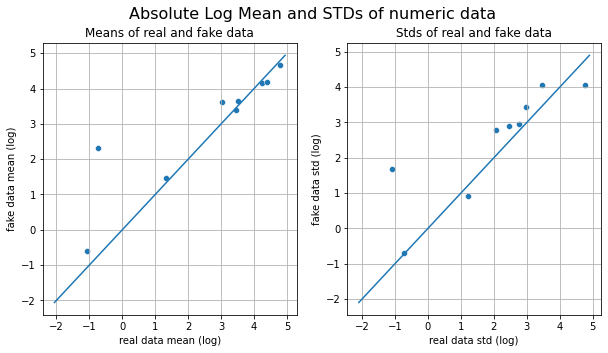

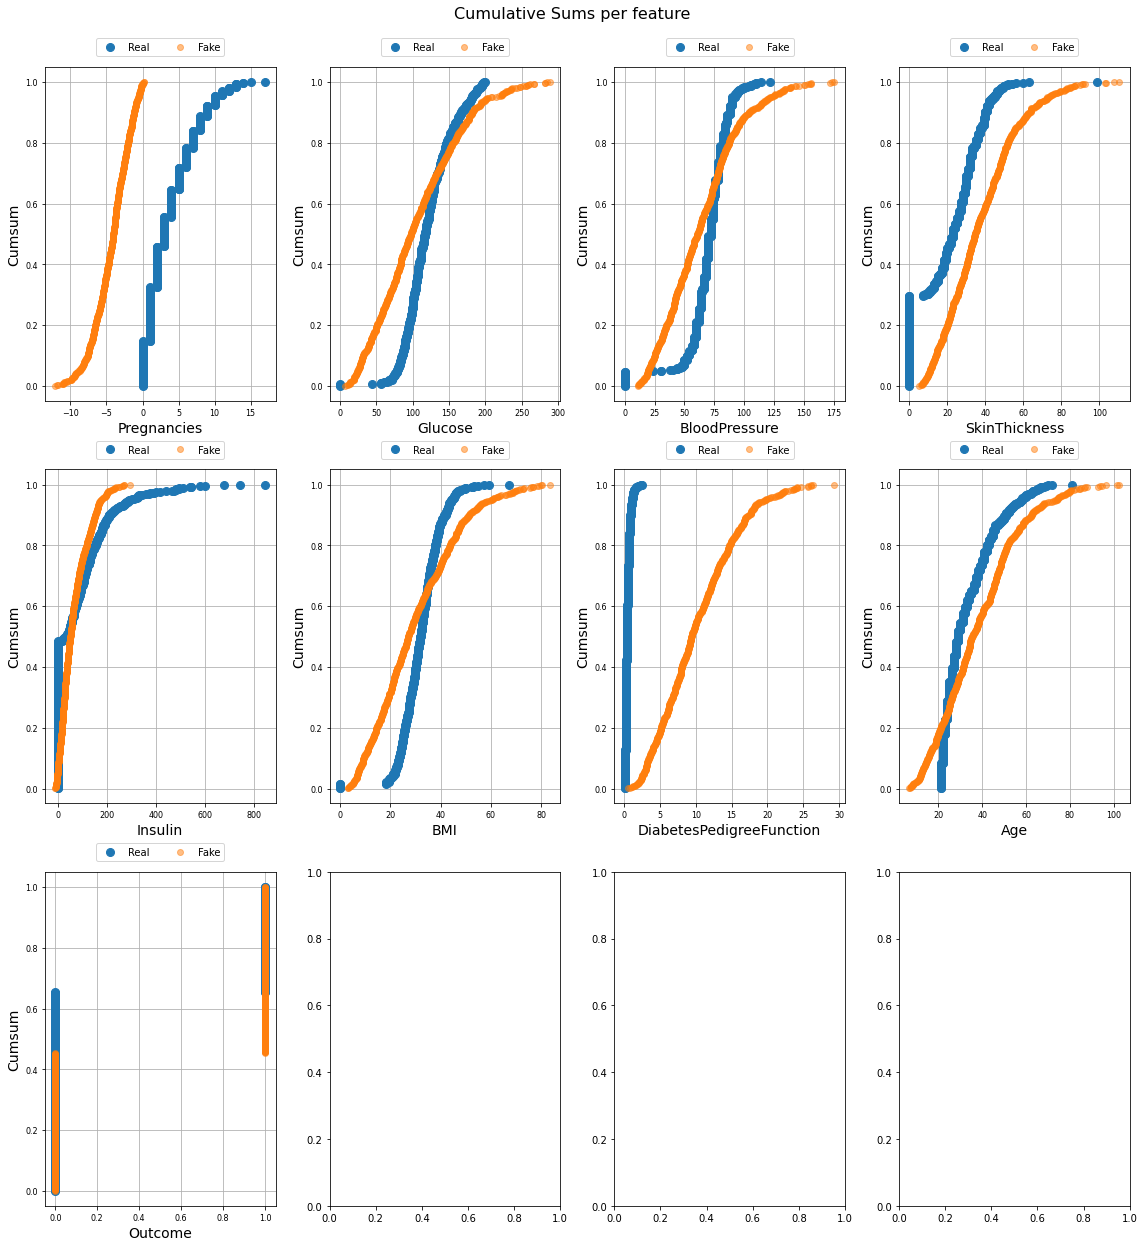

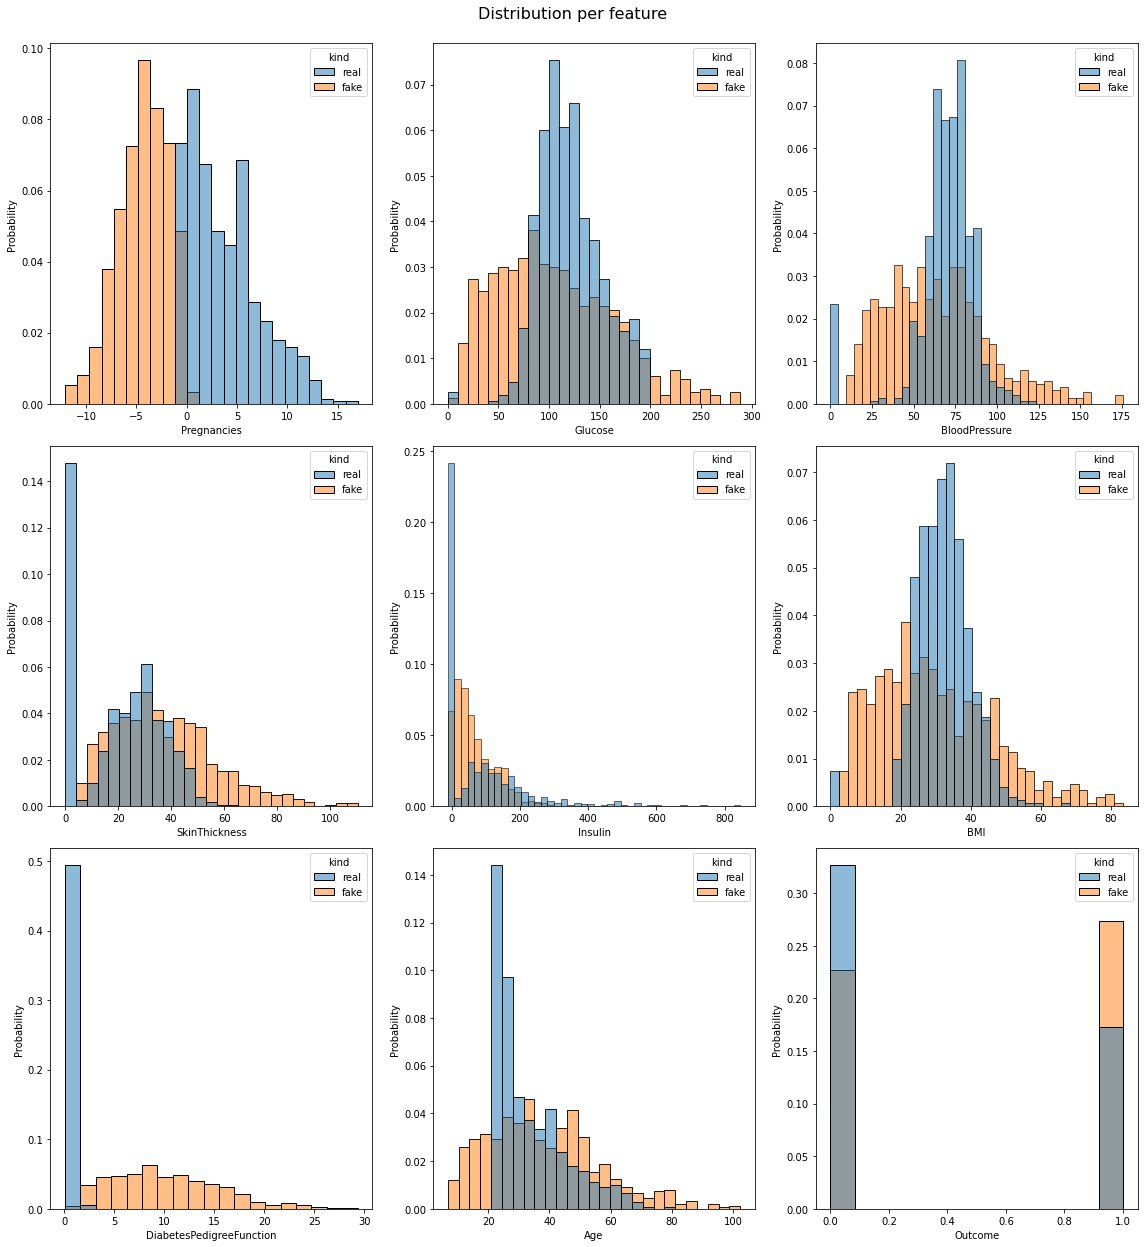

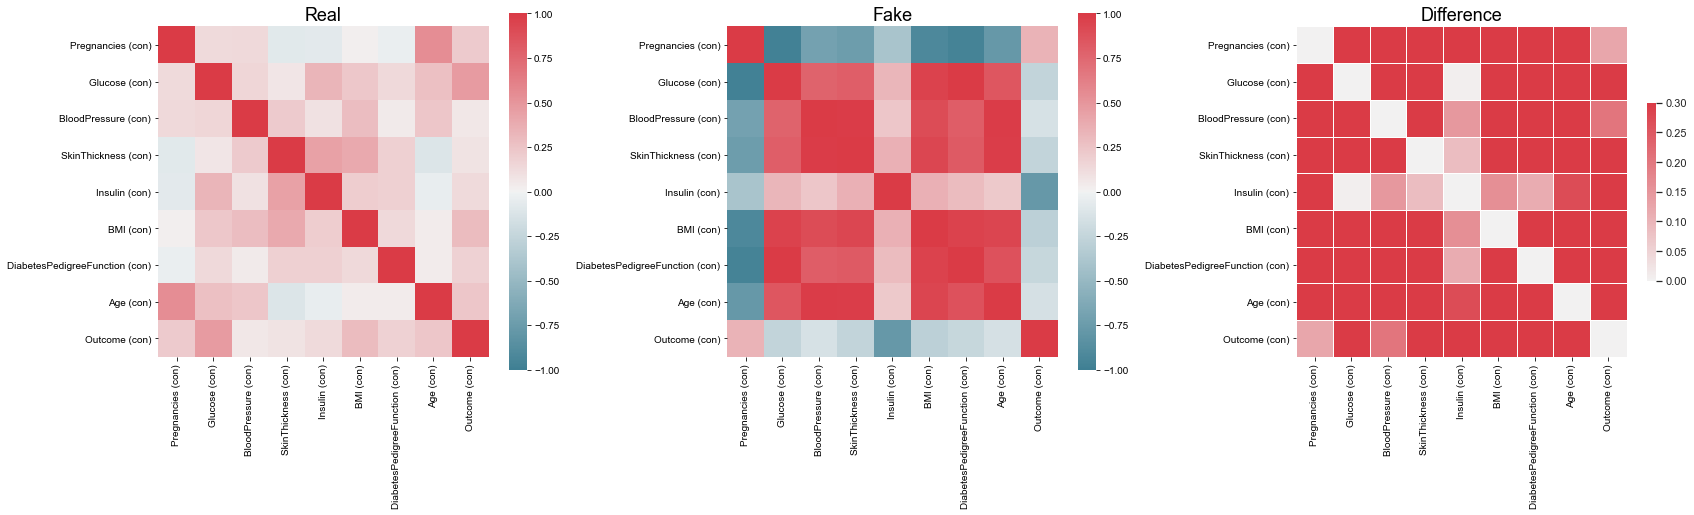

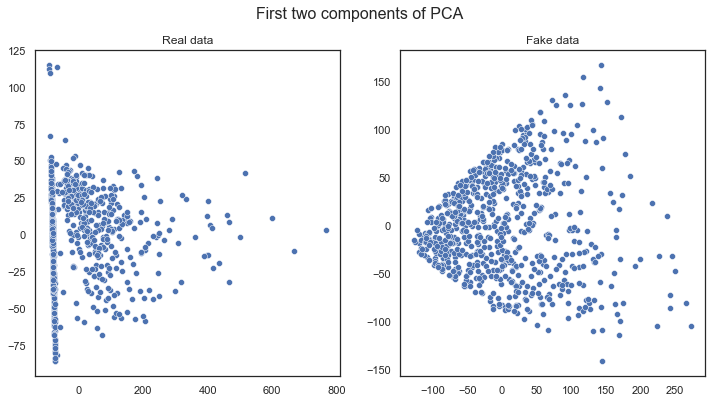

In [52]:
table_evaluator.visual_evaluation()